In [1]:
def RK2(tstart,xstart,tstop,total_steps,f_tx):
    x = xstart
    t = tstart
    h= (tstop - tstart)/total_steps

    t_array = []
    x_array = []
    x_prime1_array = []
    x_array.append(x)
    t_array.append(t)
    x_prime1_array.append(f_tx(t,x))
    for i in range(total_steps):
        k1 = h*f_tx(t,x)
        k2 = h*f_tx(t+h, x+k1)
        x += (k1+k2)/2
        t = tstart + (i+1)*h
        x_array.append(x)
        t_array.append(t)
        x_prime1_array.append(f_tx(t,x))
    return x_array,x_prime1_array,t_array, x

In [2]:
f_tx1_ = lambda t,x: 2+(x-t-1)**2
xstart = 2
tstart = 1
tstop = 1.5625
totalsteps = 172
x_array,x_prime1_array,t_array, xstop = RK2(tstart,xstart,tstop,totalsteps,f_tx1_)
print(xstop)

3.1929385640256536


In [3]:
def RK4(tstart,xstart,tstop,total_steps,f_tx):
    x = xstart
    t = tstart
    h= (tstop - tstart)/total_steps
    print('h',h)
    t_array = []
    x_array = []
    x_prime1_array = []
    for i in range(total_steps):
        k1 = h*f_tx(t,x)
        k2 = h*f_tx(t+0.5*h, x+0.5*k1)
        k3 = h*f_tx(t+0.5*h, x+0.5*k2)
        k4 = h*f_tx(t+h, x+k3)
        x_array.append(x)
        t_array.append(t)
        x_prime1_array.append(f_tx(t,x))
        x += (k1+2*k2+2*k3+k4)/6
        t = tstart + (i+1)*h
    return x_array,x_prime1_array,t_array, x

In [4]:
f_tx2= lambda t,x: 2+(x-t-1)**2
xstart = 2
tstart = 1
tstop = 1.5625
totalsteps =72
x_array,x_prime1_array,t_array, xstop = RK4(tstart,xstart,tstop,totalsteps,f_tx2)
print(xstop)

h 0.0078125
3.192937673837072


f_tx1 = lambda t,x: x + x**2
K1 = lambda t,x,h : h*f_tx1(t,x)
K2 = lambda t,x,h : h*f_tx1(t+0.5*h, x+0.5* K1(t,x,h))
K3 = lambda t,x,h : h*f_tx1(t+0.5*h, x+0.5* K2(t,x,h))
K4 = lambda t,x,h : h*f_tx1(t+h, x+K3(t,x,h))




x = 0.20466341728915526943
a = 1
b = 2.77
t = a
h= 0.01
total_steps = int((b - a)/h)
x_array = []
t_array = []
x_prime1_array = []

for i in range(total_steps):

    k1 = K1(t,x,h)
    k2 = K2(t,x,h)
    k3 = K3(t,x,h)
    k4 = K4(t,x,h)
    x_array.append(x)
    t_array.append(t)
    x_prime1_array.append(f_tx1(t,x))
    x += (k1+2*k2+2*k3+k4)/6
    t += h


    print(i,t,x)

print(t,x)



import math
f_tx1_ = lambda t,x:-2*x+ math.exp(-2*t)*t**3
xstart = 1
tstart = 0
print(f_tx1_(0,1))
print(f_tx1_(0.05,0.9))
tstop = 0.2
totalsteps = 2
x_array,x_prime1_array,t_array, xstop = RK4(tstart,xstart,tstop,totalsteps,f_tx1_)
print(xstop)

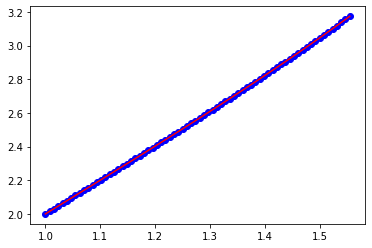

In [5]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array(x_array)
t = np.array(t_array)
x_prime = np.array(x_prime1_array)

exact_x = 1 + t + np.tan(t-1)
#et = np.exp(t,dtype=np.float64)
#et_minus_16_negative = 16-et
#e2t =  np.exp(2*t,dtype=np.float64)
#exact_x = np.divide(et,et_minus_16_negative)
plt.plot(t, x, 'bo')
plt.plot(t, exact_x, 'red')
plt.show()